In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

#Q1

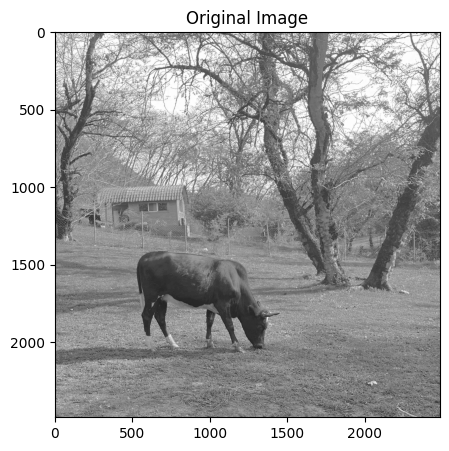

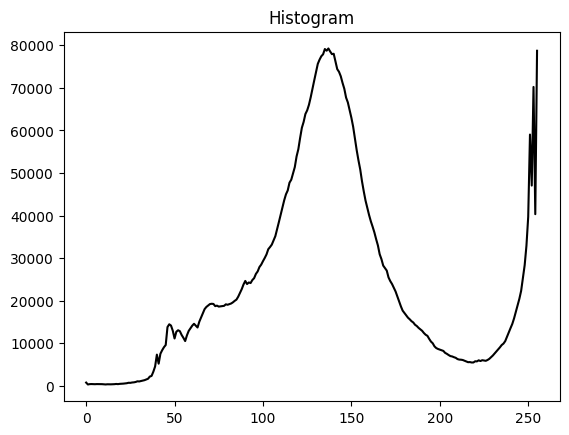

In [4]:
# Download the image from the URL
urllib.request.urlretrieve("https://drive.google.com/uc?export=download&id=1LKSbeIL0rk20PLPyXzu-QbXoLpr7mZTe", "sample.jpeg")

image = cv2.imread('sample.jpeg', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

# a - Describe contrast level by checking the image's histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.plot(hist, color='k')
plt.title('Histogram')
plt.show()

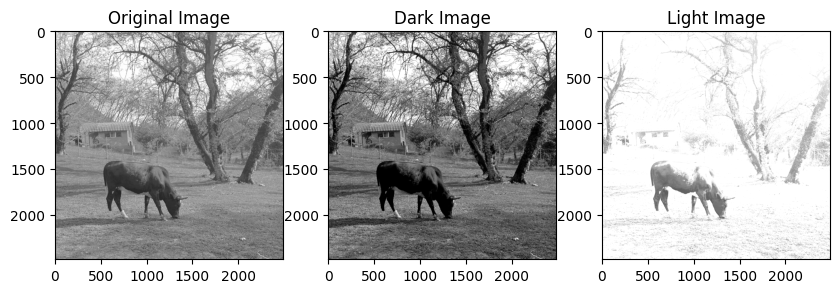

In [5]:
# b - Implement histogram sliding
def histogram_sliding_manual(image, alpha, beta):
    new_image = np.clip(alpha * image + beta, 0, 255).astype(np.uint8)
    return new_image

light_image = histogram_sliding_manual(image, 1.5, 100)
dark_image = histogram_sliding_manual(image, 1.5, -100)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(dark_image, cmap='gray')
plt.title('Dark Image')
plt.subplot(1, 3, 3)
plt.imshow(light_image, cmap='gray')
plt.title('Light Image')
plt.show()

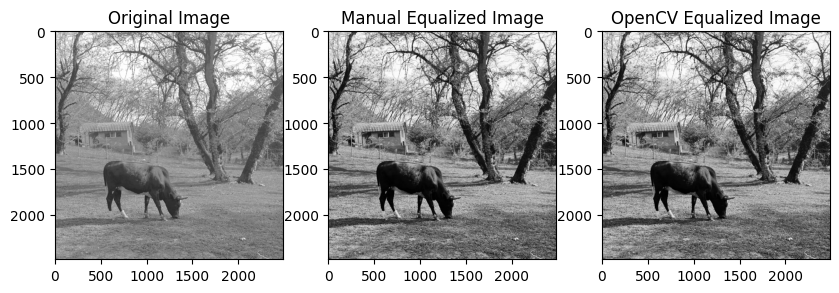

In [6]:
#c - Implement histogram equalization and apply it to the image
def histogram_equalization_manual(image):
    histogram, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = histogram.cumsum()
    cdf_normalized = cdf * histogram.max() / cdf.max()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    equalized_image = cdf[image]
    return equalized_image

# Apply histogram equalization
equalized_image_manual = histogram_equalization_manual(image)

# Using OpenCV for histogram equalization
equalized_image_opencv = cv2.equalizeHist(image)

# Compare the two outputs
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(equalized_image_manual, cmap='gray')
plt.title('Manual Equalized Image')
plt.subplot(1, 3, 3)
plt.imshow(equalized_image_opencv, cmap='gray')
plt.title('OpenCV Equalized Image')
plt.show()

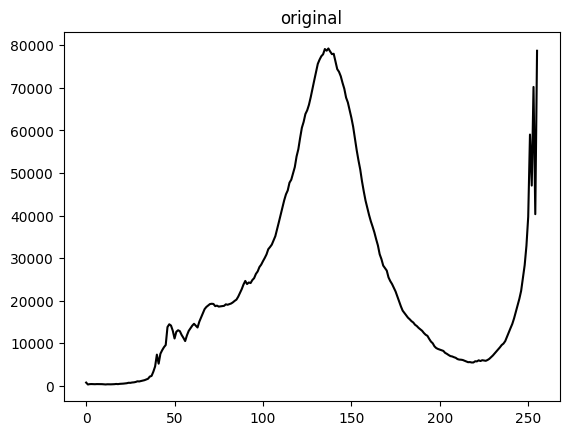

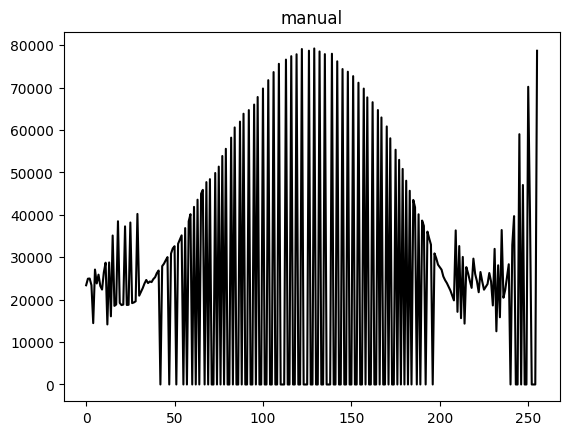

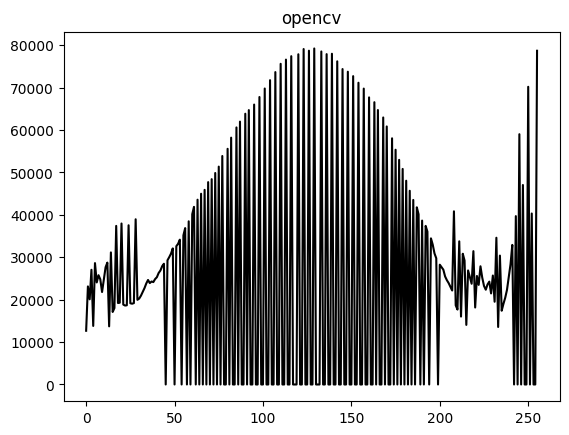

In [ ]:
# Compare the two outputs (histogram)
hist_org = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_manual = cv2.calcHist([equalized_image_manual], [0], None, [256], [0, 256])
hist_opencv = cv2.calcHist([equalized_image_opencv], [0], None, [256], [0, 256])

plt.plot(hist_org, color='k')
plt.title('original')
plt.show()
plt.plot(hist_manual, color='k')
plt.title('manual')
plt.show()
plt.plot(hist_opencv, color='k')
plt.title('opencv')
plt.show()

It can be seen that the implementation has been done well.

#Q2

In [ ]:
# function for detect stars
def detect_stars(w, h, threshold, r_list, g_list, b_list):
    visited = [[False] * w for _ in range(h)]

    # check color of a pixel
    def is_valid(x, y, r, g, b):
        return r > 240 and g > 240 and b > 240

    def dfs(x, y, star_points):
        stack = [(x, y)]
        while stack:
            x, y = stack.pop()
            if not (0 <= x < w and 0 <= y < h and not visited[y][x] and is_valid(x, y, r_list[y][x], g_list[y][x], b_list[y][x])):
                continue
            visited[y][x] = True
            star_points.append((x, y))
            for dx in range(-1, 2):
                for dy in range(-1, 2):
                    if dx == 0 and dy == 0:
                        continue
                    stack.append((x + dx, y + dy))

    stars = []
    for y in range(h):
        for x in range(w):
            r, g, b = r_list[y][x], g_list[y][x], b_list[y][x]
            if not visited[y][x] and is_valid(x, y, r, g, b):
                star_points = []
                dfs(x, y, star_points)
                if len(star_points) >= threshold:
                    stars.append((sum(p[0] for p in star_points) // len(star_points),
                                  sum(p[1] for p in star_points) // len(star_points)))

    return len(stars) , stars

if __name__ == "__main__":
    # Read in the file
    with open('input.txt', 'r') as file:
        filedata = file.read()

    # Remove ' '
    filedata = filedata.replace(', ', ',')

    # Write again
    with open('input.txt', 'w') as file:
        file.write(filedata)

    # Seperate R and G and B
    with open("input.txt", "r") as file:
        h, w, expected = map(int, file.readline().split())
        r_list, g_list, b_list = [], [], []
        for _ in range(h):
            r_row, g_row, b_row = zip(*[map(int, p.strip("()").split(",")) for p in file.readline().split()])
            r_list.append(list(r_row))
            g_list.append(list(g_row))
            b_list.append(list(b_row))

    threshold = 5
    detected, stars = detect_stars(w, h, threshold, r_list, g_list, b_list)
    while detected < expected and threshold > 0:
      threshold -= 1
      detect_stars(w, h, threshold, r_list, g_list, b_list)

    print(len(stars))
    for star in stars:
        print(f"{star[1]} {star[0]}")

12
86 33
130 89
141 158
144 151
153 156
170 56
206 117
214 21
218 155
260 155
271 233
296 224
